<a href="https://colab.research.google.com/github/robert-shepherd/fpl/blob/main/Project_3_9_xgboost_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XGBoost model


---

The purpose of this script is to further develop the xgboost model

Data sources:
* Data post feature engineering:  https://raw.githubusercontent.com/robert-shepherd/fpl/main/fpl_features.csv

Output:


In [ ]:
# Loading libraries
import pandas as pd
import pickle
import numpy as np
import scipy.stats as stats
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Model libraries
import xgboost as xgb
from xgboost import XGBRegressor

# Import measures
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error

## Setup

In [ ]:
# Reading in files from static output
X_train_url = 'https://raw.githubusercontent.com/robert-shepherd/fpl/main/X_train.csv'
X_test_url = 'https://raw.githubusercontent.com/robert-shepherd/fpl/main/X_test.csv'
Y_train_url = 'https://raw.githubusercontent.com/robert-shepherd/fpl/main/Y_train.csv'
Y_test_url = 'https://raw.githubusercontent.com/robert-shepherd/fpl/main/Y_test.csv'

X_train = pd.read_csv(X_train_url)
X_test = pd.read_csv(X_test_url)
Y_train = pd.read_csv(Y_train_url,squeeze=True)
Y_test = pd.read_csv(Y_test_url,squeeze=True)

print('X_train      : ',X_train.shape)
print('X_test       : ',X_test.shape)
print('Y_train      : ',Y_train.shape)
print('Y_test       : ',Y_test.shape)

X_train      :  (40388, 40)
X_test       :  (10098, 40)
Y_train      :  (40388,)
Y_test       :  (10098,)


In [ ]:
# Creating a copy with missing values removed
train_na = X_train.isnull().any(axis=1)
test_na = X_test.isnull().any(axis=1)

X_train_no_na = X_train[~train_na]
Y_train_no_na = Y_train[~train_na]

X_test_no_na = X_test[~test_na]
Y_test_no_na = Y_test[~test_na]

print('X_train_no_na      : ',X_train_no_na.shape)
print('X_test_no_na       : ',X_test_no_na.shape)
print('Y_train_no_na      : ',Y_train_no_na.shape)
print('Y_test_no_na       : ',Y_test_no_na.shape)

X_train_no_na      :  (32698, 40)
X_test_no_na       :  (8195, 40)
Y_train_no_na      :  (32698,)
Y_test_no_na       :  (8195,)


## XGBoost model (excluding NA)

In [ ]:
# Training XGBoost model
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', seed=42)
xgb_model_fitted = xgb_model.fit(X_train_no_na,Y_train_no_na)

In [ ]:
# Predicting on test
y_pred_xgb = xgb_model_fitted.predict(X_test_no_na)

In [ ]:
# Checking min/max prediction
min_pred = min(y_pred_xgb)
max_pred = max(y_pred_xgb)
print("Min prediction: {}".format(min_pred))
print("Max prediction: {}".format(max_pred))

Min prediction: -0.16728878021240234
Max prediction: 7.809183597564697


In [ ]:
# Checking MSE
mse = mean_squared_error(Y_test_no_na, y_pred_xgb)
print("Test MSE: {}".format(mse))

Test MSE: 4.683557448284513


In [ ]:
# Checking R2
r2 = xgb_model_fitted.score(X_test_no_na, Y_test_no_na)
print("Test R2: {}".format(r2))

Test R2: 0.26431591574305424


In [ ]:
# Checking top 20 feature importances
df_columns = X_train_no_na.columns
feature_importance = xgb_model.feature_importances_

feature_df = pd.DataFrame(df_columns,columns=['feature'])
feature_df['feature_importance'] = feature_importance

feature_df[feature_importance > 0].sort_values(by=['feature_importance']
                                               ,ascending=False).head(20)

,feature,feature_importance
6,minutes_lag,0.481087
7,minutes_rolling,0.096414
25,influence_rolling,0.093965
1,points_lag_1,0.063496
30,selected_lag,0.036014
29,threat_rolling,0.030636
23,bps_rolling,0.018471
0,opponent_strength,0.013176
2,points_lag_2,0.010591
36,was_home_True,0.010204


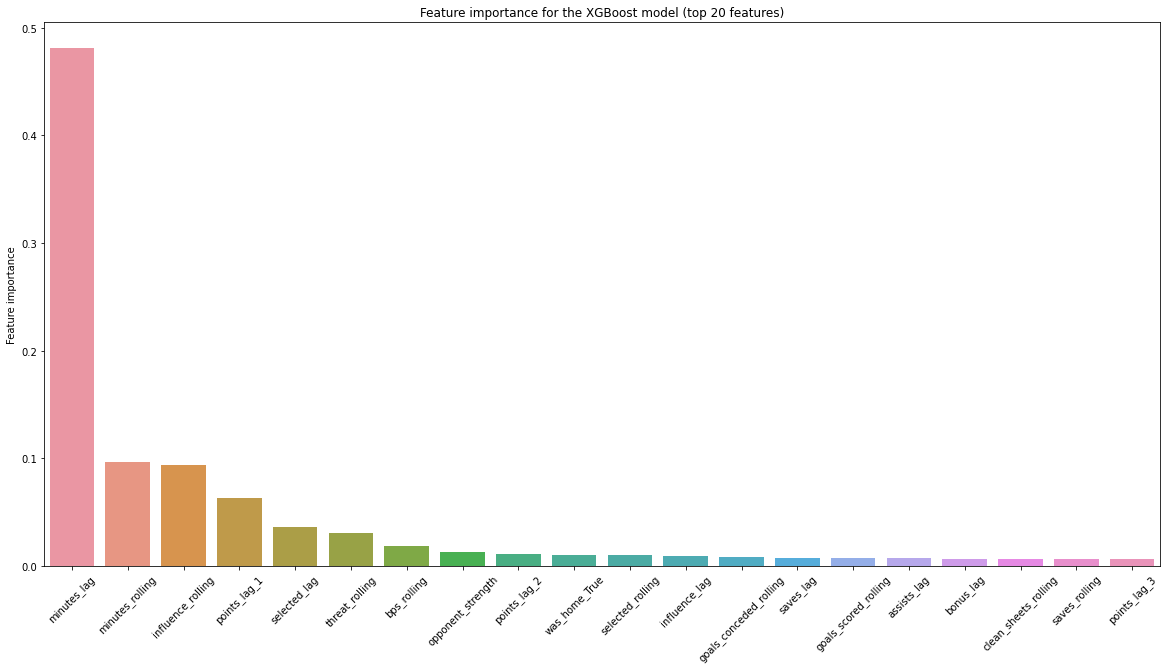

In [ ]:
# Plotting top 20 features
significant_features = feature_df[feature_importance > 0].sort_values(by=['feature_importance'],ascending=False)

top_20_features = significant_features.head(20)

plt.figure(figsize=(20,10))
sns.barplot(x="feature", y="feature_importance", data=top_20_features)
plt.title("Feature importance for the XGBoost model (top 20 features)")


plt.xlabel("")
plt.ylabel("Feature importance")
plt.xticks(rotation=45)
plt.show()

## XGBoost model (including NA)

In [ ]:
# Training XGBoost model
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', seed=42)
xgb_model_fitted = xgb_model.fit(X_train,Y_train)

In [ ]:
# Predicting on test
y_pred_xgb = xgb_model_fitted.predict(X_test)

In [ ]:
# Checking min/max prediction
min_pred = min(y_pred_xgb)
max_pred = max(y_pred_xgb)
print("Min prediction: {}".format(min_pred))
print("Max prediction: {}".format(max_pred))

Min prediction: -0.3334428071975708
Max prediction: 9.305795669555664


In [ ]:
# Checking MSE
mse = mean_squared_error(Y_test, y_pred_xgb)
print("Test MSE: {}".format(mse))

Test MSE: 4.829962747156658


In [ ]:
# Checking R2
r2 = xgb_model_fitted.score(X_test_no_na, Y_test_no_na)
print("Test R2: {}".format(r2))

Test R2: 0.26594580037511917


## Evaluating bias/variance tradeoff

In [ ]:
# Checking 10 fold cross validation error
MSE_CV_scores = cross_val_score(xgb_model_fitted, X_train, Y_train, cv=10, 
                       scoring='neg_mean_squared_error',
                       n_jobs=-1)

cv_mse = abs(MSE_CV_scores.mean())

print("CV MSE: {}".format(cv_mse))

CV MSE: 4.675247518764015


In [ ]:
# Checking training MSE
y_pred_xgb_train = xgb_model_fitted.predict(X_train)
train_mse = mean_squared_error(Y_train, y_pred_xgb_train)
print("Train MSE: {}".format(train_mse))

Train MSE: 4.455371334239104


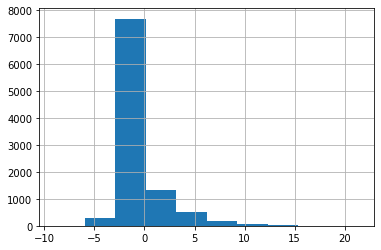

In [ ]:
# Visualising test residuals
residuals = Y_test - y_pred_xgb
residuals.hist()
plt.show()  

## Hyperparameter optimisation

In [ ]:
# Tuning max depth and min child weight

# Creating a grid search
param_grid1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

# Instantiate the regressor
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', seed=42)

# Create grid search
gsearch1 = GridSearchCV(param_grid = param_grid1, estimator = xgb_model, scoring = "neg_mean_squared_error"
,cv = 4, verbose = 1)

# Fit to the data
gsearch1.fit(X_train,Y_train)

# Print the best parameters and lowest MSE
print("Best parameters found: ", gsearch1.best_params_)
print("Lowest MSE found: ", gsearch1.best_score_)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  9.4min finished


Best parameters found:  {'max_depth': 3, 'min_child_weight': 5}
Lowest MSE found:  -4.675082474820867


In [ ]:
# Checking values either side of identified optimal values

# Creating a grid search
param_grid2 = {
 'max_depth':[2,3,4],
 'min_child_weight':[4,5,6]
}

# Instantiate the regressor
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', seed=42)

# Create grid search
gsearch2 = GridSearchCV(param_grid = param_grid2, estimator = xgb_model, scoring = "neg_mean_squared_error"
,cv = 4, verbose = 1)

# Fit to the data
gsearch2.fit(X_train,Y_train)

# Print the best parameters and lowest MSE
print("Best parameters found: ", gsearch2.best_params_)
print("Lowest MSE found: ", gsearch2.best_score_)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  3.4min finished


Best parameters found:  {'max_depth': 3, 'min_child_weight': 6}
Lowest MSE found:  -4.670750002826969


In [ ]:
# Tuning gamma parameter

param_grid3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}

# Instantiate the regressor
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', max_depth=3,
                             min_child_weight=6, seed=42)

# Create grid search
gsearch3 = GridSearchCV(param_grid = param_grid3, estimator = xgb_model, scoring = "neg_mean_squared_error"
,cv = 4, verbose = 1)

# Fit to the data
gsearch3.fit(X_train,Y_train)

# Print the best parameters and lowest MSE
print("Best parameters found: ", gsearch3.best_params_)
print("Lowest MSE found: ", gsearch3.best_score_)


Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.9min finished


Best parameters found:  {'gamma': 0.0}
Lowest MSE found:  -4.670750002826969


In [ ]:
# Tuning subsample and colsample_bytree parameters

param_grid4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}

# Instantiate the regressor
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', max_depth=3,
                             min_child_weight=6, gamma=0, seed=42)

# Create grid search
gsearch4 = GridSearchCV(param_grid = param_grid4, estimator = xgb_model, scoring = "neg_mean_squared_error"
,cv = 4, verbose = 1)

# Fit to the data
gsearch4.fit(X_train,Y_train)

# Print the best parameters and lowest MSE
print("Best parameters found: ", gsearch4.best_params_)
print("Lowest MSE found: ", gsearch4.best_score_)


Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:  5.7min finished


Best parameters found:  {'colsample_bytree': 0.6, 'subsample': 0.8}
Lowest MSE found:  -4.669212613372318


In [ ]:
# Trying values close to identified optimal values
param_grid5 = {
 'subsample':[i/100.0 for i in range(70,90,5)],
 'colsample_bytree':[i/100.0 for i in range(50,70,5)]
}

# Instantiate the regressor
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', max_depth=3,
                             min_child_weight=6, gamma=0, seed=42)

# Create grid search
gsearch5 = GridSearchCV(param_grid = param_grid5, estimator = xgb_model, scoring = "neg_mean_squared_error"
,cv = 4, verbose = 1)

# Fit to the data
gsearch5.fit(X_train,Y_train)

# Print the best parameters and lowest MSE
print("Best parameters found: ", gsearch5.best_params_)
print("Lowest MSE found: ", gsearch5.best_score_)


Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:  4.7min finished


Best parameters found:  {'colsample_bytree': 0.65, 'subsample': 0.85}
Lowest MSE found:  -4.666895128213336


In [ ]:
# Tuning regularisation parameter

# Trying values close to identified optimal values
param_grid6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

# Instantiate the regressor
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', max_depth=3,
                             min_child_weight=6, gamma=0,
                             subsample=0.85, colsample_bytree=0.65, seed=42)

# Create grid search
gsearch6 = GridSearchCV(param_grid = param_grid6, estimator = xgb_model, scoring = "neg_mean_squared_error"
,cv = 4, verbose = 1)

# Fit to the data
gsearch6.fit(X_train,Y_train)

# Print the best parameters and lowest MSE
print("Best parameters found: ", gsearch6.best_params_)
print("Lowest MSE found: ", gsearch6.best_score_)


Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.5min finished


Best parameters found:  {'reg_alpha': 1e-05}
Lowest MSE found:  -4.666895128671952


In [ ]:
# Tuning regularisation parameter

# Trying values close to identified optimal values
param_grid7 = {
 'reg_alpha':[1e-6, 1e-5, 1e-4, 1e-3]
}

# Instantiate the regressor
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', max_depth=3,
                             min_child_weight=6, gamma=0,
                             subsample=0.85, colsample_bytree=0.65, seed=42)

# Create grid search
gsearch7 = GridSearchCV(param_grid = param_grid7, estimator = xgb_model, scoring = "neg_mean_squared_error"
,cv = 4, verbose = 1)

# Fit to the data
gsearch7.fit(X_train,Y_train)

# Print the best parameters and lowest MSE
print("Best parameters found: ", gsearch7.best_params_)
print("Lowest MSE found: ", gsearch7.best_score_)


Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:  1.2min finished


Best parameters found:  {'reg_alpha': 0.001}
Lowest MSE found:  -4.666894864137182


In [ ]:
# Tuning regularisation parameter

# Trying values close to identified optimal values
param_grid8 = {
 'reg_alpha':[1e-3,3e-3,5e-3,7e-3,9e-3]
}

# Instantiate the regressor
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', max_depth=3,
                             min_child_weight=6, gamma=0,
                             subsample=0.85, colsample_bytree=0.65, seed=42)

# Create grid search
gsearch8 = GridSearchCV(param_grid = param_grid8, estimator = xgb_model, scoring = "neg_mean_squared_error"
,cv = 4, verbose = 1)

# Fit to the data
gsearch8.fit(X_train,Y_train)

# Print the best parameters and lowest MSE
print("Best parameters found: ", gsearch8.best_params_)
print("Lowest MSE found: ", gsearch8.best_score_)


Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.5min finished


Best parameters found:  {'reg_alpha': 0.005}
Lowest MSE found:  -4.666893811962095


## Evaluating tuned model

In [ ]:
# Training the tuned model
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', max_depth=3,
                             min_child_weight=6, gamma=0,
                             subsample=0.85, colsample_bytree=0.65,
                             reg_alpha=0.005, seed=42)
xgb_model_fitted = xgb_model.fit(X_train,Y_train)

In [ ]:
# Predicting on test
y_pred_xgb = xgb_model_fitted.predict(X_test)

In [ ]:
# Checking 10 fold cross validation error
MSE_CV_scores = cross_val_score(xgb_model, X_train, Y_train, cv=10, 
                       scoring='neg_mean_squared_error',
                       n_jobs=-1)

cv_mse = abs(MSE_CV_scores.mean())

print("CV MSE: {}".format(cv_mse))

CV MSE: 4.678919105735892


In [ ]:
# Checking test MSE
test_mse = mean_squared_error(Y_test, y_pred_xgb)
print("Test MSE: {}".format(test_mse))

Test MSE: 4.837799665042853


In [ ]:
# Checking training MSE
y_pred_xgb_train = xgb_model_fitted.predict(X_train)
train_mse = mean_squared_error(Y_train, y_pred_xgb_train)
print("Train MSE: {}".format(train_mse))

Train MSE: 4.459765654203635


## Saving the model

In [ ]:
# Saving the model
pickle.dump(xgb_model_fitted, open("fpl_xgb_model.dat", "wb"))

files.download('fpl_xgb_model.dat')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Saving a list of the variables used to train the model
model_variables = pd.DataFrame(X_train.columns)

# Downloading dataset
model_variables.to_csv('fpl_xgb_model_variables.csv',index=False,header=False) 
files.download('fpl_xgb_model_variables.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Files downloaded to local machine and uploaded to Google Drive